<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/(NaN_Dropped)SA_Correlations_Food_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#importing libraries 
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [43]:
#importing data with pandas 
data_path = '/content/df_final_use.csv'
general_df = pd.read_csv(data_path, encoding ='latin-1', sep=',')
general_dfi = pd.read_csv(data_path, encoding ='latin-1', sep=',')
del general_dfi['Non-Cereal Food Aid (Grain Equiv. 1000MT)']
del general_dfi['Cereal Food Aid (Grain Equiv. 1000MT)']
del general_dfi['Total Food Aid']
del general_dfi['Total Food Aid per capita (kg/cap/year)']
general_df = general_dfi.dropna()
general_df = general_df.reset_index(drop=True)
general_df

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Region
0,Algeria,1980,206.507152,2567.776695,3413.810,0.0,42.426748,0.000000,18.811,3456.236748,0.000000,136.503997,183.734876,0.000000,320.238873,North Africa
1,Algeria,1981,197.960152,1965.774252,2719.260,0.0,32.420636,0.000000,19.442,2751.680636,0.000000,101.109672,141.532797,0.000000,242.642469,North Africa
2,Algeria,1982,196.535700,1629.625445,4094.760,0.0,55.711064,0.000000,20.096,4150.471064,0.000000,81.092031,206.532199,0.000000,287.624229,North Africa
3,Algeria,1983,196.798051,1414.955573,3766.460,0.0,90.644673,0.308102,20.763,3857.104673,0.308102,68.147935,185.768178,0.014839,253.901274,North Africa
4,Algeria,1984,191.743128,1594.689654,4115.570,0.0,65.202708,0.000000,21.433,4180.772708,0.000000,74.403474,195.062413,0.000000,269.465887,North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,Zimbabwe,2008,153.700079,932.603468,1007.425,0.0,0.545611,0.004930,12.452,1007.970611,0.004930,74.895878,80.948491,0.000396,155.843973,Southern Africa
2283,Zimbabwe,2009,141.317483,1677.731196,576.300,0.0,2.163975,0.014400,12.474,578.463975,0.014400,134.498252,46.373575,0.001154,180.870673,Southern Africa
2284,Zimbabwe,2010,136.990970,1723.572567,368.600,0.0,2.163975,0.014400,12.571,370.763975,0.014400,137.107037,29.493594,0.001145,166.599486,Southern Africa
2285,Zimbabwe,2011,139.933312,1765.470308,640.000,0.0,2.163975,0.014400,12.754,642.163975,0.014400,138.424832,50.350006,0.001129,188.773709,Southern Africa


In [44]:
#using function to create scatter plots for each country showing the relationship between two variables  
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #adding a linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #Calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr

Zimbabwe
2.9367971313644214
148.67578499013388
0.3540617835082091
Zambia
1.8593357301772628
166.11320727074136
0.20888315623517442
Swaziland
1.5140086693635255
117.44920114832388
0.010842245834280005
Namibia
-0.54775683601353
109.53347173416408
0.04038685820025445
Mozambique
8.594475520976825
158.90622036514878
0.4903596408404263
Malawi
4.175908158438434
206.07601536716155
0.2872135527016079
Madagascar
4.636260383785934
209.3962139386593
0.03933206844270299
Lesotho
2.0127236500250296
91.39434680213309
0.02286475488847392


,Exports (all) per capita (kg/cap/year),Production Quantity per capita (kg/cap/year)
Exports (all) per capita (kg/cap/year),1.000000,0.151211
Production Quantity per capita (kg/cap/year),0.151211,1.000000


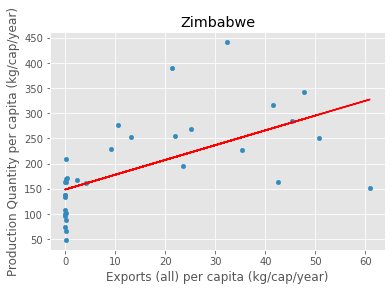

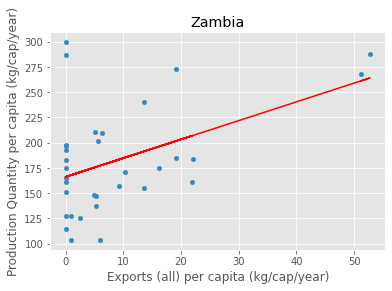

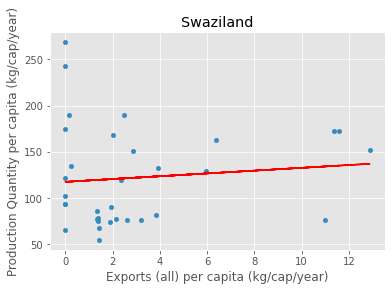

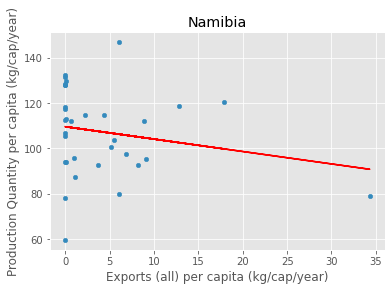

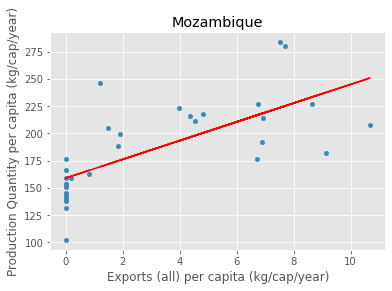

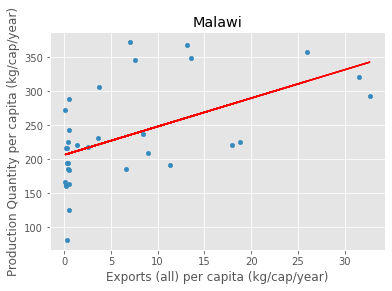

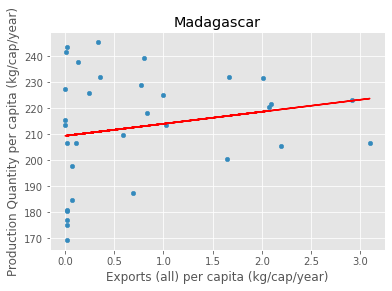

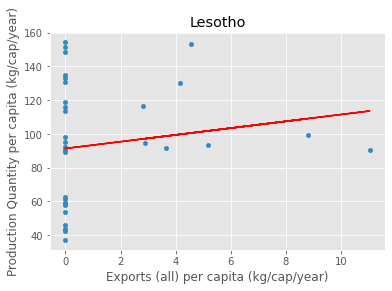

In [45]:
#calling the function for every country in Southern Africa, choosing food production per capita and food exports per capita as the arguments
#allows us to explore the relationship between food production per capita and food exports per capita  
plot_country('Zimbabwe','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Zambia','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Swaziland','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Namibia','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Mozambique','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Malawi','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Madagascar','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Lesotho','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')

In [46]:
#correlation coefficient between exports per capita and production per capita  
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Exports (all) per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                0.595031
Exports (all) per capita (kg/cap/year)                                            0.595031                                1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                0.457037
Exports (all) per capita (kg/cap/year)                                            0.457037                                1.000000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)             

Zimbabwe
-1.7321977416412988
257.34758481866925
0.47524012996153475
Zambia
-1.106836444437557
212.59929356363858
0.2247351101027282
Swaziland
-1.048736872165388
218.96174856825175
0.26873254228043925
Namibia
-0.5956940321841115
154.7532658844087
0.39736261902310166
Mozambique
-0.6736960922844752
208.1462514240969
0.030064154228093727
Malawi
-2.5300707511308187
273.57324660964036
0.23838218110977355
Madagascar
-0.07842560781061544
214.2256297079743
0.0007616867706373829
Lesotho
-0.5127270808551182
145.40793381133577
0.11835386579874993


,Imports (all) per capita (kg/cap/year),Production Quantity per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year),1.000000,-0.344026
Production Quantity per capita (kg/cap/year),-0.344026,1.000000


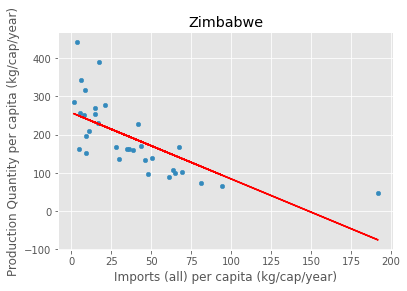

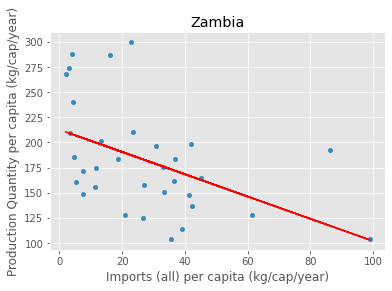

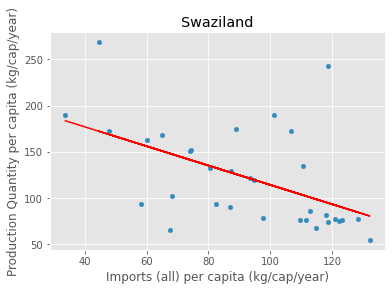

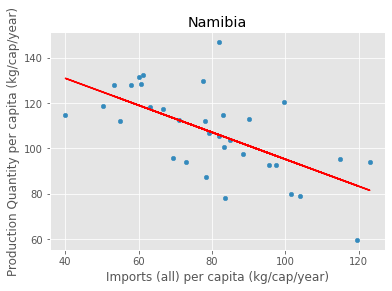

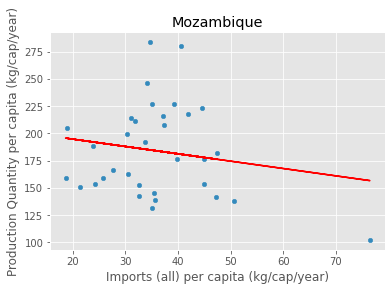

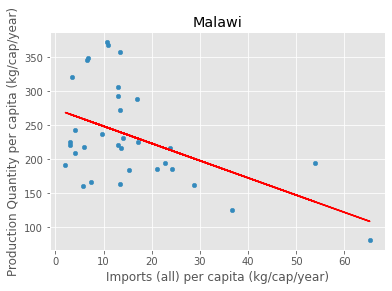

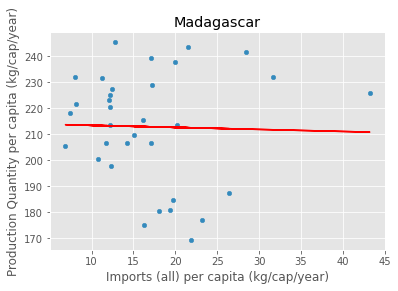

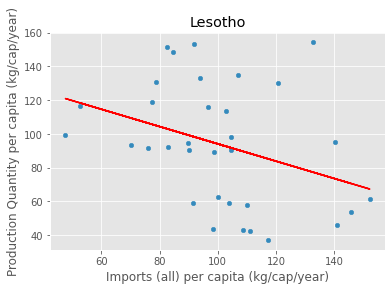

In [47]:
#calling the function for every country in Southern Africa, choosing food production per capita and food imports per capita as the arguments
#allows us to explore the relationship between food production per capita and food imports per capita 
plot_country('Zimbabwe','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Zambia','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Swaziland','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Namibia','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Mozambique','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Malawi','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Madagascar','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Lesotho','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')

In [48]:
#correlation coefficient between imports per capita and production per capita 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Import Quantity (Grains & Ce.)(1000MT)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)                                      1.000000                               -0.724927
Import Quantity (Grains & Ce.)(1000MT)                                           -0.724927                                1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)                                      1.000000                               -0.597223
Import Quantity (Grains & Ce.)(1000MT)                                           -0.597223                                1.000000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)             